# Speech Emotion Recognition using RAVDESS dataset - experimenting with Random Forest Classifier and different features (MFCC and spectral)

## For Tuesday 15 March 2022

**Main findings:**

MFCC data accuracy: No mean calculated 72.5% , mean calculated 86.67%

Spectral data accuracy: No mean calculated 71.67% , mean calculated 67.5%

MFCC and Spectral data accuracy: No mean calculated 71.67% , mean calculated 81.67%


### Setting up dataset to input into classifier

In [2]:
# importing libraries
import os
import time
import pandas as pd
import numpy as np
import soundfile as sf
import librosa

In [3]:
#set directory
d = 'ravdess'
df = pd.DataFrame()
temp =[]
##features from file names
df['file'] = [x for x in os.listdir(d)] #create file column of filenames
df['emotion']=[x.split('-')[2] for x in df['file']] #read emotion code from filename
#df['emotion'].replace({'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'},inplace=True)
#for x in [x.split('-')[6][0:2] for x in df['file']]: #read actor code from filename
       # if int(x%2)==0:
       #     df['gender']='female' #even = female, odd =male, store in gender column
      #  else:
          #  df['gender']='male'
df['gender'] = [x.split('-')[6][0:2] for x in df['file']]
df['intensity']=[x.split('-')[3] for x in df['file']] #read intensity code from filename 
#df['intensity'].replace({'01':'normal','02':'strong'},inplace=True) #replace intensity code and store in intensity column
temp.append(df) #append all folder data to temp list

FileNotFoundError: [Errno 2] No such file or directory: 'ravdess'

## MFCC Dataset (filling NaN values with 0 and *not* calculating mean)

In [3]:
mfcc = []
file_name = []

filepath = [os.path.join(d, x) for x in df['file']] #create path to individual files
for file in filepath: #iterate each file and retrieve mel_spec data
    data, sample_rate = librosa.load(file)
    file_name.append(file)
    mfcc.append(librosa.feature.mfcc(y=data, sr=sample_rate))
    
df1 = pd.DataFrame()
df1['mfcc'] = mfcc
df1['file'] = [x for x in os.listdir(d)]

In [20]:
df_mfcc = pd.merge(df, df1, how='inner', left_on='file', right_on='file')

In [21]:
gender_test=[]
for i in range(len(df_mfcc)):
    if int(df_mfcc['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_mfcc['gender'] = gender_test

In [22]:
df_mfcc = df_mfcc.loc[(df_mfcc['emotion'] == '01')|(df_mfcc['emotion'] == '03')|(df_mfcc['emotion'] == '04')].reset_index(drop=True)

In [23]:
df_mfcc = df_mfcc.drop('file',1)

In [55]:
df_mfcc['mfcc_new'] = ''
 
for i in range(len(df_mfcc)):
    
    l = df_mfcc['mfcc'][i]
    
    df_mfcc['mfcc_new'][i]= [item for sublist in l for item in sublist]

In [57]:
d = [pd.DataFrame(df_mfcc[col].tolist()).add_prefix(col) for col in df_mfcc.columns]
df_mfcc = pd.concat(d, axis=1)

/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [60]:
df_mfcc = df_mfcc.fillna(0)

In [62]:
df_mfcc = df_mfcc.drop('mfcc0',axis=1)

In [63]:
df_mfcc

,emotion0,gender0,intensity0,mfcc_new0,mfcc_new1,mfcc_new2,mfcc_new3,mfcc_new4,mfcc_new5,mfcc_new6,...,mfcc_new4090,mfcc_new4091,mfcc_new4092,mfcc_new4093,mfcc_new4094,mfcc_new4095,mfcc_new4096,mfcc_new4097,mfcc_new4098,mfcc_new4099
0,01,01,01,-915.163208,-915.163208,-914.908630,-914.849915,-915.163208,-915.163208,-915.163208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,01,01,-879.690186,-879.690186,-873.163635,-864.435791,-862.414307,-863.710693,-864.682739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03,01,01,-785.859375,-785.285400,-784.644897,-784.226318,-785.347717,-785.859375,-785.859375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03,01,01,-821.489258,-821.057068,-820.103394,-821.237549,-821.726624,-821.726624,-816.922363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,04,01,01,-851.416565,-851.416565,-851.416565,-851.416565,-851.416565,-851.416565,-851.416565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,03,02,02,-707.891663,-707.891663,-707.891663,-707.891663,-707.891663,-707.891663,-707.891663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,03,02,01,-748.231201,-748.231201,-748.231201,-748.231201,-748.231201,-748.231201,-748.231201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,01,02,01,-792.841919,-789.637817,-788.639587,-789.023621,-788.808533,-789.120972,-790.110413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,01,02,01,-797.663574,-796.354858,-799.138916,-799.913147,-799.052246,-799.779419,-800.140869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_mfcc.to_csv('df_mfcc.csv')

### Splitting MFCC data into train and test datasets

In [225]:
from sklearn.model_selection import train_test_split

X_mfcc = np.array(df_mfcc.drop('emotion',1))

y_mfcc = np.array(df_mfcc['emotion'])

X_train_mfcc,X_test_mfcc,y_train_mfcc,y_test_mfcc = train_test_split(X_mfcc,y_mfcc,test_size=0.25,random_state=66)

### Random Forest Classifier on MFCC Data

In [226]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc, y_train_mfcc)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500, 1000, 2000]})

In [227]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto',random_state=66)
rf.fit(X_train_mfcc,y_train_mfcc)
rf_predictor = rf.predict(X_test_mfcc)
rf_accuracy=accuracy_score(y_true=y_test_mfcc, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 72.50%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


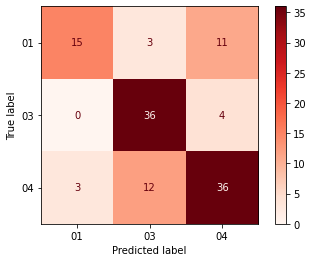

In [229]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc, y_test_mfcc, cmap=plt.cm.Reds)
plt.show()

**Trouble at predicting 'neutral' - more than a third being predicted as 'sad'. Predicting 'happy' is most acurrate. Slight overlap between 'sad and 'happy' when predicting 'sad'**

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00328
Feature: 2, Score: 0.00131
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00091
Feature: 6, Score: 0.00015
Feature: 7, Score: 0.00210
Feature: 8, Score: 0.00320
Feature: 9, Score: 0.00124
Feature: 10, Score: 0.00311
Feature: 11, Score: 0.00212
Feature: 12, Score: 0.00040
Feature: 13, Score: 0.00238
Feature: 14, Score: 0.00139
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00029
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00112
Feature: 19, Score: 0.00157
Feature: 20, Score: 0.00040
Feature: 21, Score: 0.00011
Feature: 22, Score: 0.00109
Feature: 23, Score: 0.00054
Feature: 24, Score: 0.00059
Feature: 25, Score: 0.00101
Feature: 26, Score: 0.00022
Feature: 27, Score: 0.00040
Feature: 28, Score: 0.00069
Feature: 29, Score: 0.00165
Feature: 30, Score: 0.00201
Feature: 31, Score: 0.00010
Feature: 32, Score: 0.00050
Feature: 33, Score: 0.00009
Feature: 34, Score: 0.00184
Feature: 35, Score: 0.00166
Fe

Feature: 2272, Score: 0.00008
Feature: 2273, Score: 0.00034
Feature: 2274, Score: 0.00000
Feature: 2275, Score: 0.00026
Feature: 2276, Score: 0.00085
Feature: 2277, Score: 0.00000
Feature: 2278, Score: 0.00013
Feature: 2279, Score: 0.00009
Feature: 2280, Score: 0.00095
Feature: 2281, Score: 0.00016
Feature: 2282, Score: 0.00000
Feature: 2283, Score: 0.00055
Feature: 2284, Score: 0.00017
Feature: 2285, Score: 0.00000
Feature: 2286, Score: 0.00063
Feature: 2287, Score: 0.00000
Feature: 2288, Score: 0.00026
Feature: 2289, Score: 0.00023
Feature: 2290, Score: 0.00000
Feature: 2291, Score: 0.00000
Feature: 2292, Score: 0.00000
Feature: 2293, Score: 0.00093
Feature: 2294, Score: 0.00027
Feature: 2295, Score: 0.00009
Feature: 2296, Score: 0.00059
Feature: 2297, Score: 0.00004
Feature: 2298, Score: 0.00054
Feature: 2299, Score: 0.00020
Feature: 2300, Score: 0.00012
Feature: 2301, Score: 0.00032
Feature: 2302, Score: 0.00024
Feature: 2303, Score: 0.00000
Feature: 2304, Score: 0.00000
Feature: 2

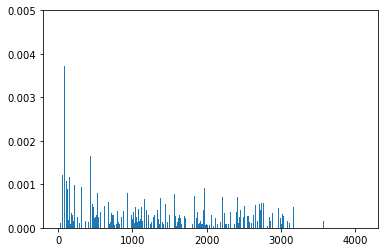

In [230]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Intensity being recorded as feature with highest importance**

## Spectral Dataset (filling NaN values with 0 and *not* calculating mean)

In [93]:
rms = []
chroma_stft = []
spec_cent = []
spec_bw = []
spec_rolloff = []
zcr = []
file_name = []

filepath = [os.path.join(d, x) for x in df['file']] #create path to individual files
for file in filepath: #iterate each file and retrieve mel_spec data
    data, sample_rate = librosa.load(file)
    file_name.append(file)
    rms.append(librosa.feature.rms(y=data))
    chroma_stft.append(librosa.feature.chroma_stft(y=data, sr=sample_rate))
    spec_cent.append(librosa.feature.spectral_centroid(y=data, sr=sample_rate))
    spec_bw.append(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate))
    spec_rolloff.append(librosa.feature.spectral_rolloff(y=data, sr=sample_rate))
    zcr.append(librosa.feature.zero_crossing_rate(data))

df2 = pd.DataFrame()
df2['rms'] = rms
df2['chroma_stft'] = chroma_stft
df2['spec_cent'] = spec_cent
df2['spec_rolloff'] = spec_rolloff
df2['zcr'] = zcr
df2['file'] = [x for x in os.listdir(d)]

In [213]:
df_spec = pd.merge(df, df2, how='inner', left_on='file', right_on='file')

In [214]:
gender_test=[]
for i in range(len(df_spec)):
    if int(df_spec['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_spec['gender'] = gender_test

In [215]:
df_spec = df_spec.loc[(df_spec['emotion'] == '01')|(df_spec['emotion'] == '03')|(df_spec['emotion'] == '04')].reset_index(drop=True)

In [216]:
df_spec = df_spec.drop('file',1)

In [217]:
df_spec['rms_new'] = ''
df_spec['chroma_stft_new'] = ''
df_spec['spec_cent_new'] = ''
df_spec['spec_rolloff_new'] = ''
df_spec['zcr_new'] = ''

for i in range(len(df_spec)):
    
    l = df_spec['rms'][i]
    k = df_spec['chroma_stft'][i]
    m = df_spec['spec_cent'][i]
    n = df_spec['spec_rolloff'][i]
    h = df_spec['zcr'][i]
    
    df_spec['rms_new'][i]= [item for sublist in l for item in sublist]
    df_spec['chroma_stft_new'][i]= [item for sublist in k for item in sublist]
    df_spec['spec_cent_new'][i]= [item for sublist in m for item in sublist]
    df_spec['spec_rolloff_new'][i]= [item for sublist in n for item in sublist]
    df_spec['zcr_new'][i]= [item for sublist in h for item in sublist]

In [218]:
d1 = [pd.DataFrame(df_spec[col].tolist()).add_prefix(col) for col in df_spec.columns]
df_spec = pd.concat(d1, axis=1)

/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [219]:
df_spec = df_spec.fillna(0)

In [220]:
df_spec = df_spec.rename(columns={"emotion0":"emotion","gender0":"gender","intensity0":"intensity"})

In [222]:
df_spec = df_spec.drop(['rms0','chroma_stft0','spec_cent0','spec_rolloff0','zcr0'],axis=1)

In [223]:
df_spec.head()

,emotion,gender,intensity,rms_new0,rms_new1,rms_new2,rms_new3,rms_new4,rms_new5,rms_new6,...,zcr_new195,zcr_new196,zcr_new197,zcr_new198,zcr_new199,zcr_new200,zcr_new201,zcr_new202,zcr_new203,zcr_new204
0,01,01,01,0.000002,0.000003,0.000003,0.000002,0.000002,4.179804e-07,2.999718e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,01,01,0.000002,0.000007,0.000032,0.000045,0.000051,5.741068e-05,5.582448e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03,01,01,0.000005,0.000007,0.000009,0.000008,0.000007,5.164255e-06,2.182087e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03,01,01,0.000005,0.000007,0.000007,0.000006,0.000005,1.138767e-05,1.741643e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,04,01,01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_spec.to_csv('df_spec.csv')

### Splitting spectral data into test and train datasets

In [231]:
from sklearn.model_selection import train_test_split

X_spec = np.array(df_spec.drop('emotion',1))

y_spec = np.array(df_spec['emotion'])

X_train_spec,X_test_spec,y_train_spec,y_test_spec = train_test_split(X_spec,y_spec,test_size=0.25,random_state=66)

### Random Forest Classifier on Spectral Data

In [232]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_spec, y_train_spec)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500, 1000, 2000]})

In [233]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_spec,y_train_spec)
rf_predictor = rf.predict(X_test_spec)
rf_accuracy=accuracy_score(y_true=y_test_spec, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 71.67%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


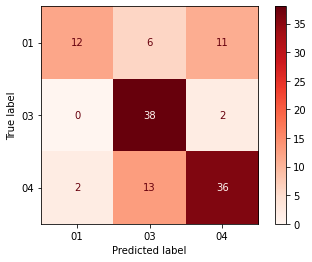

In [235]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_spec, y_test_spec, cmap=plt.cm.Reds)
plt.show()

**High accuracy in predicting 'happy'. Again trouble predicting 'neutral' - large overlap with 'sad'. Slight overlap in 'sad' and 'happy' when predicting 'sad'**

Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00154
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00030
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.00016
Feature: 6, Score: 0.00012
Feature: 7, Score: 0.00018
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.00029
Feature: 11, Score: 0.00039
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00025
Feature: 14, Score: 0.00039
Feature: 15, Score: 0.00024
Feature: 16, Score: 0.00016
Feature: 17, Score: 0.00025
Feature: 18, Score: 0.00030
Feature: 19, Score: 0.00018
Feature: 20, Score: 0.00016
Feature: 21, Score: 0.00023
Feature: 22, Score: 0.00021
Feature: 23, Score: 0.00029
Feature: 24, Score: 0.00037
Feature: 25, Score: 0.00024
Feature: 26, Score: 0.00047
Feature: 27, Score: 0.00038
Feature: 28, Score: 0.00046
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00049
Feature: 31, Score: 0.00041
Feature: 32, Score: 0.00030
Feature: 33, Score: 0.00023
Feature: 34, Score: 0.00038
Feature: 35, Score: 0.00039
Fe

Feature: 2779, Score: 0.00024
Feature: 2780, Score: 0.00031
Feature: 2781, Score: 0.00025
Feature: 2782, Score: 0.00030
Feature: 2783, Score: 0.00038
Feature: 2784, Score: 0.00052
Feature: 2785, Score: 0.00052
Feature: 2786, Score: 0.00079
Feature: 2787, Score: 0.00067
Feature: 2788, Score: 0.00087
Feature: 2789, Score: 0.00113
Feature: 2790, Score: 0.00069
Feature: 2791, Score: 0.00059
Feature: 2792, Score: 0.00082
Feature: 2793, Score: 0.00068
Feature: 2794, Score: 0.00037
Feature: 2795, Score: 0.00059
Feature: 2796, Score: 0.00096
Feature: 2797, Score: 0.00044
Feature: 2798, Score: 0.00020
Feature: 2799, Score: 0.00040
Feature: 2800, Score: 0.00034
Feature: 2801, Score: 0.00032
Feature: 2802, Score: 0.00018
Feature: 2803, Score: 0.00016
Feature: 2804, Score: 0.00021
Feature: 2805, Score: 0.00023
Feature: 2806, Score: 0.00017
Feature: 2807, Score: 0.00015
Feature: 2808, Score: 0.00025
Feature: 2809, Score: 0.00025
Feature: 2810, Score: 0.00009
Feature: 2811, Score: 0.00014
Feature: 2

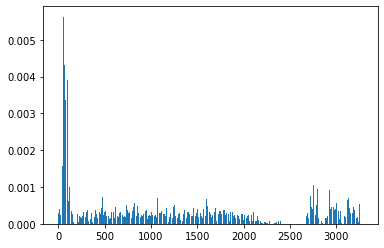

In [244]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.ylim(0,0.005)
plt.show()

In [249]:
df_spec.iloc[:,100]

0      0.004619
1      0.005287
2      0.005794
3      0.014282
4      0.001527
         ...   
475    0.001292
476    0.004356
477    0.008142
478    0.010894
479    0.023016
Name: rms_new97, Length: 480, dtype: float64

**Looks like RMS values might have highest importance?**

## MFCC Dataset (filling NaN values with 0 *and* calculating mean)

In [260]:
mfcc_mean = []


filepath = [os.path.join(d, x) for x in df['file']] #create path to individual files
for file in filepath: #iterate each file and retrieve mel_spec data
    data, sample_rate = librosa.load(file)
    file_name = file
    mfcc_mean.append(np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0))

df3 = pd.DataFrame()
df3['mfcc'] = mfcc_mean
df3['file'] = [x for x in os.listdir(d)]

In [261]:
df_mfcc_mean = pd.merge(df, df3, how='inner', left_on='file', right_on='file')

In [262]:
gender_test=[]
for i in range(len(df_mfcc_mean)):
    if int(df_mfcc_mean['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_mfcc_mean['gender'] = gender_test

In [263]:
df_mfcc_mean = df_mfcc_mean.loc[(df_mfcc_mean['emotion'] == '01')|(df_mfcc_mean['emotion'] == '03')|(df_mfcc_mean['emotion'] == '04')].reset_index(drop=True)

In [264]:
df_mfcc_mean = df_mfcc_mean.drop('file',1)

In [265]:
d2 = [pd.DataFrame(df_mfcc_mean[col].tolist()).add_prefix(col) for col in df_mfcc_mean.columns]
df_mfcc_mean = pd.concat(d2, axis=1)

In [266]:
df_mfcc_mean = df_mfcc_mean.fillna(0)

In [268]:
df_mfcc_mean = df_mfcc_mean.rename(columns={"emotion0":"emotion","gender0":"gender","intensity0":"intensity"})

In [269]:
df_mfcc_mean.to_csv('df_mfcc_mean.csv')

### Splitting mean MFCC data into test and train datasets

In [270]:
from sklearn.model_selection import train_test_split

X_mfcc_mean = np.array(df_mfcc_mean.drop('emotion',1))

y_mfcc_mean = np.array(df_mfcc_mean['emotion'])

X_train_mfcc_mean,X_test_mfcc_mean,y_train_mfcc_mean,y_test_mfcc_mean = train_test_split(X_mfcc_mean,y_mfcc_mean,test_size=0.25,random_state=66)

### Random Forest Classifier on Mean MFCC Data

In [271]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [50,100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc_mean, y_train_mfcc_mean)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500, 1000, 2000]})

In [272]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_mfcc_mean,y_train_mfcc_mean)
rf_predictor = rf.predict(X_test_mfcc_mean)
rf_accuracy=accuracy_score(y_true=y_test_mfcc_mean, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 86.67%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


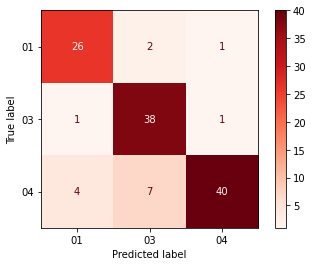

In [274]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc_mean, y_test_mfcc_mean, cmap=plt.cm.Reds)
plt.show()

**Taking the mean seems to improve the classification of 'neutral'**

Feature: 0, Score: 0.00551
Feature: 1, Score: 0.03883
Feature: 2, Score: 0.12306
Feature: 3, Score: 0.04968
Feature: 4, Score: 0.09528
Feature: 5, Score: 0.04544
Feature: 6, Score: 0.04977
Feature: 7, Score: 0.04222
Feature: 8, Score: 0.04204
Feature: 9, Score: 0.04409
Feature: 10, Score: 0.05042
Feature: 11, Score: 0.03851
Feature: 12, Score: 0.04449
Feature: 13, Score: 0.03906
Feature: 14, Score: 0.03981
Feature: 15, Score: 0.03442
Feature: 16, Score: 0.03512
Feature: 17, Score: 0.03486
Feature: 18, Score: 0.03905
Feature: 19, Score: 0.03830
Feature: 20, Score: 0.03390
Feature: 21, Score: 0.03615


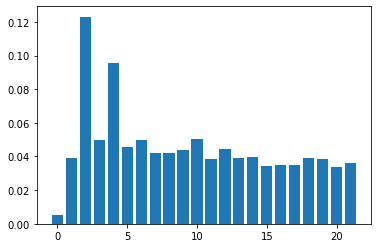

In [275]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.ylim(0,0.005)
plt.show()

**Intensity seems to be the feature of highest importance**

## Spectral Dataset (filling NaN values with 0 *and* calculating mean)

In [278]:
rms = []
chroma_stft = []
spec_cent = []
spec_bw = []
spec_rolloff = []
zcr = []
mfcc = []
file_name = []

filepath = [os.path.join(d, x) for x in df['file']] #create path to individual files
for file in filepath: #iterate each file and retrieve mel_spec data
    data, sample_rate = librosa.load(file)
    file_name = file
    rms.append(np.mean(librosa.feature.rms(y=data).T, axis=0))
    chroma_stft.append(np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0))
    spec_cent.append(np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0))
    spec_bw.append(np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0))
    spec_rolloff.append(np.mean(librosa.feature.spectral_rolloff(y=data, sr=sample_rate).T, axis=0))
    zcr.append(np.mean(librosa.feature.zero_crossing_rate(data).T, axis=0))

df4 = pd.DataFrame()
df4['rms'] = rms
df4['chroma_stft'] = chroma_stft
df4['spec_cent'] = spec_cent
df4['spec_rolloff'] = spec_rolloff
df4['zcr'] = zcr
df4['file'] = [x for x in os.listdir(d)]

In [279]:
df_spec_mean = pd.merge(df, df4, how='inner', left_on='file', right_on='file')

In [280]:
gender_test=[]
for i in range(len(df_spec_mean)):
    if int(df_spec_mean['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_spec_mean['gender'] = gender_test

In [281]:
df_spec_mean = df_spec_mean.loc[(df_spec_mean['emotion'] == '01')|(df_spec_mean['emotion'] == '03')|(df_spec_mean['emotion'] == '04')].reset_index(drop=True)


In [282]:
df_spec_mean = df_spec_mean.drop('file',1)

In [283]:
d3 = [pd.DataFrame(df_spec_mean[col].tolist()).add_prefix(col) for col in df_spec_mean.columns]
df_spec_mean = pd.concat(d3, axis=1)

In [284]:
df_spec_mean = df_spec_mean.fillna(0)

In [285]:
df_spec_mean = df_spec_mean.rename(columns={"emotion0":"emotion","gender0":"gender","intensity0":"intensity"})

In [286]:
df_spec_mean.to_csv('df_spec_mean.csv')

### Splitting mean Spectral data into test and train datasets

In [288]:
from sklearn.model_selection import train_test_split

X_spec_mean = np.array(df_spec_mean.drop('emotion',1))

y_spec_mean = np.array(df_spec_mean['emotion'])

X_train_spec_mean,X_test_spec_mean,y_train_spec_mean,y_test_spec_mean = train_test_split(X_spec_mean,y_spec_mean,test_size=0.25,random_state=66)

### Random Forest Classifier on Mean Spectral Data

In [289]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [50,100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_spec_mean, y_train_spec_mean)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500, 1000, 2000]})

In [290]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 2000}

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=2000, max_features='auto',random_state=66)
rf.fit(X_train_spec_mean,y_train_spec_mean)
rf_predictor = rf.predict(X_test_spec_mean)
rf_accuracy=accuracy_score(y_true=y_test_spec_mean, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 67.50%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


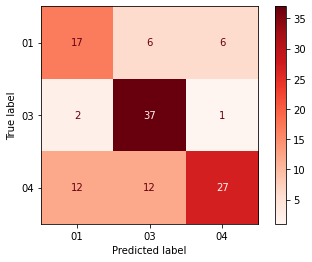

In [292]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_spec_mean, y_test_spec_mean, cmap=plt.cm.Reds)
plt.show()

Feature: 0, Score: 0.00523
Feature: 1, Score: 0.05381
Feature: 2, Score: 0.18981
Feature: 3, Score: 0.05270
Feature: 4, Score: 0.05027
Feature: 5, Score: 0.04246
Feature: 6, Score: 0.04472
Feature: 7, Score: 0.04752
Feature: 8, Score: 0.05810
Feature: 9, Score: 0.04499
Feature: 10, Score: 0.05593
Feature: 11, Score: 0.06024
Feature: 12, Score: 0.05846
Feature: 13, Score: 0.04891
Feature: 14, Score: 0.04422
Feature: 15, Score: 0.04626
Feature: 16, Score: 0.04613
Feature: 17, Score: 0.05022


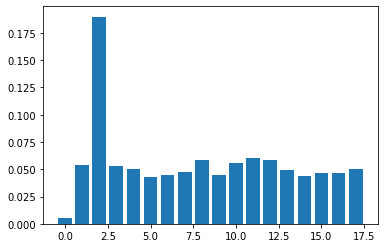

In [293]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.ylim(0,0.005)
plt.show()

## Spectral and MFCC Data joined (no mean)

In [298]:
df_joined = pd.merge(df1,df2, how='inner', left_on='file', right_on='file' )

In [300]:
df_joined = pd.merge(df,df_joined, how='inner', left_on='file', right_on='file' )

In [301]:
df_joined

,file,emotion,gender,intensity,mfcc,rms,chroma_stft,spec_cent,spec_rolloff,zcr
0,03-01-06-01-02-02-02.wav,06,02,01,"[[-772.2547, -772.2547, -772.2547, -772.2547, ...","[[1.760352e-06, 1.760352e-06, 1.760352e-06, 0....","[[0.21777077, 0.20808117, 0.19798058, 0.0, 0.9...","[[6943.094451559096, 6967.562056400451, 6973.2...","[[10056.005859375, 10056.005859375, 10066.7724...","[[0.08251953125, 0.08251953125, 0.08251953125,..."
1,03-01-05-01-02-01-16.wav,05,16,01,"[[-724.7665, -724.7665, -724.7665, -724.7665, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,03-01-08-01-01-01-14.wav,08,14,01,"[[-844.3148, -844.3148, -844.3148, -844.3148, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,03-01-06-01-02-02-16.wav,06,16,01,"[[-708.9089, -708.9089, -708.9089, -708.9089, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,03-01-05-01-02-01-02.wav,05,02,01,"[[-765.24603, -765.24603, -765.24603, -765.246...","[[2.9990488e-07, 8.579881e-07, 2.7917483e-06, ...","[[0.9604718, 0.96146375, 0.8574731, 0.83207124...","[[5226.036512197528, 5219.498162727828, 5137.7...","[[8882.4462890625, 8871.6796875, 8742.48046875...","[[0.0478515625, 0.09521484375, 0.23046875, 0.2..."
...,...,...,...,...,...,...,...,...,...,...
1435,03-01-08-02-02-01-19.wav,08,19,02,"[[-802.6042, -801.54675, -802.3316, -802.171, ...","[[2.3322591e-05, 2.9308005e-05, 3.7478734e-05,...","[[0.815678, 1.0, 1.0, 1.0, 0.9868574, 1.0, 1.0...","[[3482.3937255952496, 3756.3450373107203, 3904...","[[7978.0517578125, 8301.0498046875, 8419.48242...","[[0.146484375, 0.22705078125, 0.2705078125, 0...."
1436,03-01-02-02-01-01-23.wav,02,23,02,"[[-852.5617, -852.6478, -853.51984, -854.53424...","[[6.0455422e-06, 6.833704e-06, 7.0367896e-06, ...","[[0.95288885, 0.78815883, 0.98031527, 0.913425...","[[4390.167891393373, 4708.996592833959, 4809.2...","[[8505.615234375, 8699.4140625, 8720.947265625...","[[0.287109375, 0.453125, 0.61572265625, 0.6406..."
1437,03-01-02-01-02-01-23.wav,02,23,01,"[[-815.7633, -814.39294, -815.0985, -816.2814,...","[[5.970371e-06, 6.509077e-06, 6.5536474e-06, 5...","[[0.9603112, 0.8511672, 0.95133096, 0.99649936...","[[4710.6831982237245, 4699.5926271935705, 4735...","[[8602.5146484375, 8580.9814453125, 8624.04785...","[[0.28955078125, 0.49560546875, 0.6328125, 0.6..."
1438,03-01-08-01-01-01-19.wav,08,19,01,"[[-856.12555, -853.843, -853.876, -851.64294, ...","[[1.1807502e-05, 1.6854105e-05, 2.5489217e-05,...","[[0.98326564, 0.9838628, 0.9067266, 0.9454195,...","[[3988.3106932473584, 4076.9899531853043, 3961...","[[8441.015625, 8484.08203125, 8494.8486328125,...","[[0.2783203125, 0.39990234375, 0.47314453125, ..."


In [302]:
gender_test=[]
for i in range(len(df_joined)):
    if int(df_joined['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_joined['gender'] = gender_test

df_joined = df_joined.loc[(df_joined['emotion'] == '01')|(df_joined['emotion'] == '03')|(df_joined['emotion'] == '04')].reset_index(drop=True)

df_joined = df_joined.drop('file',1)

df_joined = df_joined.fillna(0)

In [305]:
df_joined

,emotion,gender,intensity,mfcc,rms,chroma_stft,spec_cent,spec_rolloff,zcr,rms_new,chroma_stft_new,spec_cent_new,spec_rolloff_new,zcr_new,mfcc_new
0,01,01,01,"[[-915.1632, -915.1632, -914.9086, -914.8499, ...","[[1.8532965e-06, 2.738405e-06, 2.770121e-06, 2...","[[0.6644835, 0.8187539, 0.66048795, 0.580503, ...","[[5038.884881996219, 4972.422003525779, 4875.5...","[[9043.9453125, 9000.87890625, 8914.74609375, ...","[[0.28076171875, 0.43603515625, 0.48486328125,...",,,,,,
1,01,01,01,"[[-879.6902, -879.6902, -873.16364, -864.4358,...","[[2.1128233e-06, 6.8615686e-06, 3.2421412e-05,...","[[0.5535877, 0.66653264, 0.8959511, 0.7545895,...","[[4838.895363065984, 4874.4371763641575, 4050....","[[8613.28125, 8785.546875, 8397.94921875, 8107...","[[0.28369140625, 0.4013671875, 0.44580078125, ...",,,,,,
2,03,01,01,"[[-785.8594, -785.2854, -784.6449, -784.2263, ...","[[5.1927314e-06, 7.188318e-06, 8.688561e-06, 8...","[[1.0, 0.7302362, 0.8085539, 0.82275575, 0.896...","[[4834.339899980868, 4674.812963138497, 4671.5...","[[8602.5146484375, 8570.21484375, 8656.3476562...","[[0.34228515625, 0.5, 0.6533203125, 0.51806640...",,,,,,
3,03,01,01,"[[-821.48926, -821.05707, -820.1034, -821.2375...","[[5.437391e-06, 6.6099697e-06, 6.965471e-06, 6...","[[0.41688037, 0.333547, 0.28315726, 0.38480538...","[[4441.201399128374, 4688.078139123867, 4493.5...","[[8527.1484375, 8720.947265625, 8645.581054687...","[[0.37890625, 0.5693359375, 0.6806640625, 0.60...",,,,,,
4,04,01,01,"[[-851.41656, -851.41656, -851.41656, -851.416...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,03,02,02,"[[-707.89166, -707.89166, -707.89166, -707.891...","[[4.2415562e-07, 7.315586e-07, 1.722303e-06, 2...","[[0.95914876, 0.93597674, 0.88608515, 0.796963...","[[5219.433743628236, 5226.384362959607, 5152.0...","[[8871.6796875, 8882.4462890625, 8850.14648437...","[[0.0966796875, 0.20263671875, 0.40576171875, ...",,,,,,
476,03,02,01,"[[-748.2312, -748.2312, -748.2312, -748.2312, ...","[[2.0997695e-06, 2.6452094e-06, 2.9729647e-06,...","[[0.6233085, 0.6934236, 0.72887933, 0.6813342,...","[[4912.121373574208, 5066.183796810669, 5169.2...","[[8311.81640625, 8720.947265625, 8968.57910156...","[[0.373046875, 0.53515625, 0.7236328125, 0.688...",,,,,,
477,01,02,01,"[[-792.8419, -789.6378, -788.6396, -789.0236, ...","[[7.9269936e-05, 0.00010472558, 0.00011844524,...","[[0.7658003, 0.5656502, 0.5827094, 0.65171933,...","[[3080.7812181491636, 2624.4226999542825, 2527...","[[7870.3857421875, 7310.5224609375, 7170.55664...","[[0.08203125, 0.09814453125, 0.12939453125, 0....",,,,,,
478,01,02,01,"[[-797.6636, -796.35486, -799.1389, -799.91315...","[[6.626456e-05, 9.8992125e-05, 0.00010997913, ...","[[0.99384594, 1.0, 0.97969544, 0.9790436, 0.98...","[[2487.9113112859527, 2541.839599408342, 2273....","[[6890.625, 7105.95703125, 6815.2587890625, 63...","[[0.017578125, 0.0732421875, 0.16015625, 0.142...",,,,,,


In [307]:
df_joined['rms_new'] = ''
df_joined['chroma_stft_new'] = ''
df_joined['spec_cent_new'] = ''
df_joined['spec_rolloff_new'] = ''
df_joined['zcr_new'] = ''
df_joined['mfcc_new'] = ''

for i in range(len(df_joined)):
    
    l = df_joined['rms'][i]
    k = df_joined['chroma_stft'][i]
    m = df_joined['spec_cent'][i]
    n = df_joined['spec_rolloff'][i]
    h = df_joined['zcr'][i]
    q = df_joined['mfcc'][i]
    
    df_joined['rms_new'][i]= [item for sublist in l for item in sublist]
    df_joined['chroma_stft_new'][i]= [item for sublist in k for item in sublist]
    df_joined['spec_cent_new'][i]= [item for sublist in m for item in sublist]
    df_joined['spec_rolloff_new'][i]= [item for sublist in n for item in sublist]
    df_joined['zcr_new'][i]= [item for sublist in h for item in sublist]
    df_joined['mfcc_new'][i]= [item for sublist in q for item in sublist]

In [310]:
df_joined

,emotion,gender,intensity,mfcc,rms,chroma_stft,spec_cent,spec_rolloff,zcr,rms_new,chroma_stft_new,spec_cent_new,spec_rolloff_new,zcr_new,mfcc_new
0,01,01,01,"[[-915.1632, -915.1632, -914.9086, -914.8499, ...","[[1.8532965e-06, 2.738405e-06, 2.770121e-06, 2...","[[0.6644835, 0.8187539, 0.66048795, 0.580503, ...","[[5038.884881996219, 4972.422003525779, 4875.5...","[[9043.9453125, 9000.87890625, 8914.74609375, ...","[[0.28076171875, 0.43603515625, 0.48486328125,...","[1.8532965e-06, 2.738405e-06, 2.770121e-06, 2....","[0.6644835, 0.8187539, 0.66048795, 0.580503, 0...","[5038.884881996219, 4972.422003525779, 4875.50...","[9043.9453125, 9000.87890625, 8914.74609375, 8...","[0.28076171875, 0.43603515625, 0.48486328125, ...","[-915.1632, -915.1632, -914.9086, -914.8499, -..."
1,01,01,01,"[[-879.6902, -879.6902, -873.16364, -864.4358,...","[[2.1128233e-06, 6.8615686e-06, 3.2421412e-05,...","[[0.5535877, 0.66653264, 0.8959511, 0.7545895,...","[[4838.895363065984, 4874.4371763641575, 4050....","[[8613.28125, 8785.546875, 8397.94921875, 8107...","[[0.28369140625, 0.4013671875, 0.44580078125, ...","[2.1128233e-06, 6.8615686e-06, 3.2421412e-05, ...","[0.5535877, 0.66653264, 0.8959511, 0.7545895, ...","[4838.895363065984, 4874.4371763641575, 4050.4...","[8613.28125, 8785.546875, 8397.94921875, 8107....","[0.28369140625, 0.4013671875, 0.44580078125, 0...","[-879.6902, -879.6902, -873.16364, -864.4358, ..."
2,03,01,01,"[[-785.8594, -785.2854, -784.6449, -784.2263, ...","[[5.1927314e-06, 7.188318e-06, 8.688561e-06, 8...","[[1.0, 0.7302362, 0.8085539, 0.82275575, 0.896...","[[4834.339899980868, 4674.812963138497, 4671.5...","[[8602.5146484375, 8570.21484375, 8656.3476562...","[[0.34228515625, 0.5, 0.6533203125, 0.51806640...","[5.1927314e-06, 7.188318e-06, 8.688561e-06, 8....","[1.0, 0.7302362, 0.8085539, 0.82275575, 0.8964...","[4834.339899980868, 4674.812963138497, 4671.51...","[8602.5146484375, 8570.21484375, 8656.34765625...","[0.34228515625, 0.5, 0.6533203125, 0.518066406...","[-785.8594, -785.2854, -784.6449, -784.2263, -..."
3,03,01,01,"[[-821.48926, -821.05707, -820.1034, -821.2375...","[[5.437391e-06, 6.6099697e-06, 6.965471e-06, 6...","[[0.41688037, 0.333547, 0.28315726, 0.38480538...","[[4441.201399128374, 4688.078139123867, 4493.5...","[[8527.1484375, 8720.947265625, 8645.581054687...","[[0.37890625, 0.5693359375, 0.6806640625, 0.60...","[5.437391e-06, 6.6099697e-06, 6.965471e-06, 6....","[0.41688037, 0.333547, 0.28315726, 0.38480538,...","[4441.201399128374, 4688.078139123867, 4493.52...","[8527.1484375, 8720.947265625, 8645.5810546875...","[0.37890625, 0.5693359375, 0.6806640625, 0.604...","[-821.48926, -821.05707, -820.1034, -821.23755..."
4,04,01,01,"[[-851.41656, -851.41656, -851.41656, -851.416...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-851.41656, -851.41656, -851.41656, -851.4165..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,03,02,02,"[[-707.89166, -707.89166, -707.89166, -707.891...","[[4.2415562e-07, 7.315586e-07, 1.722303e-06, 2...","[[0.95914876, 0.93597674, 0.88608515, 0.796963...","[[5219.433743628236, 5226.384362959607, 5152.0...","[[8871.6796875, 8882.4462890625, 8850.14648437...","[[0.0966796875, 0.20263671875, 0.40576171875, ...","[4.2415562e-07, 7.315586e-07, 1.722303e-06, 2....","[0.95914876, 0.93597674, 0.88608515, 0.7969638...","[5219.433743628236, 5226.384362959607, 5152.04...","[8871.6796875, 8882.4462890625, 8850.146484375...","[0.0966796875, 0.20263671875, 0.40576171875, 0...","[-707.89166, -707.89166, -707

In [311]:
d5 = [pd.DataFrame(df_joined[col].tolist()).add_prefix(col) for col in df_joined.columns]
df_joined = pd.concat(d5, axis=1)

/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [317]:
df_joined = df_joined.rename(columns={"emotion0":"emotion","gender0":"gender","intensity0":"intensity"})

In [313]:
df_joined=df_joined.drop(['mfcc0','rms0','chroma_stft0','spec_cent0','spec_rolloff0','zcr0'],axis=1)

In [319]:
df_joined = df_joined.fillna(0)
df_joined.head()

,emotion,gender,intensity,rms_new0,rms_new1,rms_new2,rms_new3,rms_new4,rms_new5,rms_new6,...,mfcc_new4090,mfcc_new4091,mfcc_new4092,mfcc_new4093,mfcc_new4094,mfcc_new4095,mfcc_new4096,mfcc_new4097,mfcc_new4098,mfcc_new4099
0,01,01,01,0.000002,0.000003,0.000003,0.000002,0.000002,4.179804e-07,2.999718e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,01,01,0.000002,0.000007,0.000032,0.000045,0.000051,5.741068e-05,5.582448e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03,01,01,0.000005,0.000007,0.000009,0.000008,0.000007,5.164255e-06,2.182087e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03,01,01,0.000005,0.000007,0.000007,0.000006,0.000005,1.138767e-05,1.741643e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,04,01,01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
from sklearn.model_selection import train_test_split

X_joined = np.array(df_joined.drop('emotion',1))

y_joined = np.array(df_joined['emotion'])

X_train_joined,X_test_joined,y_train_joined,y_test_joined = train_test_split(X_joined,y_joined,test_size=0.25,random_state=66)

In [320]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [50,100,250,500,1000,2000,3000,4000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_joined, y_train_joined)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500, 1000, 2000, 3000,
                                          4000]})

In [321]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_joined,y_train_joined)
rf_predictor = rf.predict(X_test_joined)
rf_accuracy=accuracy_score(y_true=y_test_joined, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 71.67%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


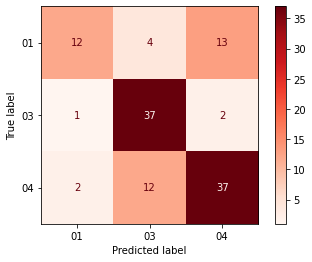

In [323]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_joined, y_test_joined, cmap=plt.cm.Reds)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00100
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00014
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00004
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.00010
Feature: 9, Score: 0.00008
Feature: 10, Score: 0.00010
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.00005
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.00009
Feature: 17, Score: 0.00007
Feature: 18, Score: 0.00013
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00011
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00012
Feature: 24, Score: 0.00027
Feature: 25, Score: 0.00015
Feature: 26, Score: 0.00016
Feature: 27, Score: 0.00017
Feature: 28, Score: 0.00018
Feature: 29, Score: 0.00021
Feature: 30, Score: 0.00010
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00009
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00010
Feature: 35, Score: 0.00001
Fe

Feature: 2903, Score: 0.00009
Feature: 2904, Score: 0.00011
Feature: 2905, Score: 0.00007
Feature: 2906, Score: 0.00009
Feature: 2907, Score: 0.00020
Feature: 2908, Score: 0.00025
Feature: 2909, Score: 0.00038
Feature: 2910, Score: 0.00040
Feature: 2911, Score: 0.00029
Feature: 2912, Score: 0.00020
Feature: 2913, Score: 0.00013
Feature: 2914, Score: 0.00010
Feature: 2915, Score: 0.00011
Feature: 2916, Score: 0.00011
Feature: 2917, Score: 0.00025
Feature: 2918, Score: 0.00010
Feature: 2919, Score: 0.00013
Feature: 2920, Score: 0.00018
Feature: 2921, Score: 0.00007
Feature: 2922, Score: 0.00034
Feature: 2923, Score: 0.00033
Feature: 2924, Score: 0.00039
Feature: 2925, Score: 0.00028
Feature: 2926, Score: 0.00047
Feature: 2927, Score: 0.00031
Feature: 2928, Score: 0.00024
Feature: 2929, Score: 0.00024
Feature: 2930, Score: 0.00013
Feature: 2931, Score: 0.00009
Feature: 2932, Score: 0.00014
Feature: 2933, Score: 0.00038
Feature: 2934, Score: 0.00036
Feature: 2935, Score: 0.00011
Feature: 2

Feature: 5402, Score: 0.00021
Feature: 5403, Score: 0.00009
Feature: 5404, Score: 0.00023
Feature: 5405, Score: 0.00014
Feature: 5406, Score: 0.00012
Feature: 5407, Score: 0.00007
Feature: 5408, Score: 0.00005
Feature: 5409, Score: 0.00010
Feature: 5410, Score: 0.00007
Feature: 5411, Score: 0.00014
Feature: 5412, Score: 0.00006
Feature: 5413, Score: 0.00006
Feature: 5414, Score: 0.00002
Feature: 5415, Score: 0.00009
Feature: 5416, Score: 0.00015
Feature: 5417, Score: 0.00020
Feature: 5418, Score: 0.00018
Feature: 5419, Score: 0.00008
Feature: 5420, Score: 0.00016
Feature: 5421, Score: 0.00003
Feature: 5422, Score: 0.00015
Feature: 5423, Score: 0.00007
Feature: 5424, Score: 0.00014
Feature: 5425, Score: 0.00006
Feature: 5426, Score: 0.00019
Feature: 5427, Score: 0.00012
Feature: 5428, Score: 0.00009
Feature: 5429, Score: 0.00008
Feature: 5430, Score: 0.00020
Feature: 5431, Score: 0.00021
Feature: 5432, Score: 0.00012
Feature: 5433, Score: 0.00012
Feature: 5434, Score: 0.00020
Feature: 5

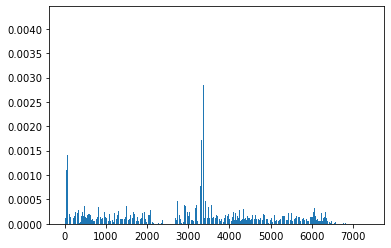

In [324]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.ylim(0,0.005)
plt.show()

## Spectral and MFCC Data joined (with mean)

In [333]:
df_joined_mean = pd.merge(df3,df4, how='inner', left_on='file', right_on='file' )
df_joined_mean = pd.merge(df,df_joined_mean, how='inner', left_on='file', right_on='file' )

In [334]:
gender_test=[]
for i in range(len(df_joined_mean)):
    if int(df_joined_mean['gender'][i]) % 2 == 0:
        gender_test.append('01')
    else:
            gender_test.append('02')
df_joined_mean['gender'] = gender_test

df_joined_mean = df_joined_mean.loc[(df_joined_mean['emotion'] == '01')|(df_joined_mean['emotion'] == '03')|(df_joined_mean['emotion'] == '04')].reset_index(drop=True)

df_joined_mean = df_joined_mean.drop('file',1)

df_joined_mean = df_joined_mean.fillna(0)

In [335]:
d6 = [pd.DataFrame(df_joined_mean[col].tolist()).add_prefix(col) for col in df_joined_mean.columns]
df_joined_mean = pd.concat(d6, axis=1)

In [336]:
df_joined_mean = df_joined_mean.rename(columns={"emotion0":"emotion","gender0":"gender","intensity0":"intensity"})
df_joined_mean = df_joined_mean.fillna(0)
df_joined_mean.head()

,emotion,gender,intensity,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,spec_cent0,spec_rolloff0,zcr0
0,01,01,01,-710.797791,53.439884,-15.190395,8.793199,-0.554165,-10.416554,-11.918135,...,0.458093,0.427682,0.422479,0.426264,0.461991,0.533545,0.514755,3292.791391,6144.839129,0.331946
1,01,01,01,-676.566650,52.879017,4.699556,6.543308,4.021244,-2.198579,-2.779084,...,0.601214,0.568712,0.488712,0.518640,0.481957,0.453352,0.444004,3291.333895,6386.789193,0.282883
2,03,01,01,-574.169189,42.048840,-50.638577,7.814415,-3.251385,-23.890253,-15.885047,...,0.341126,0.404479,0.392472,0.419510,0.451320,0.479635,0.448864,3145.441996,5718.169697,0.247987
3,03,01,01,-600.397705,60.840874,-14.167917,8.259460,2.347058,-7.515831,-1.725289,...,0.494363,0.503283,0.430280,0.367213,0.353648,0.410746,0.427172,2866.889715,5730.440090,0.251310
4,04,01,01,-668.933594,55.743156,-10.204071,9.223741,-5.716846,-2.916350,-5.042352,...,0.308379,0.288932,0.317586,0.399763,0.465375,0.432404,0.393010,2198.071518,4113.172061,0.236915


In [337]:
from sklearn.model_selection import train_test_split

X_joined_mean = np.array(df_joined_mean.drop('emotion',1))

y_joined_mean = np.array(df_joined_mean['emotion'])

X_train_joined_mean,X_test_joined_mean,y_train_joined_mean,y_test_joined_mean = train_test_split(X_joined_mean,y_joined_mean,test_size=0.25,random_state=66)

In [338]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [50,100,250,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_joined_mean, y_train_joined_mean)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=66),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500, 1000]})

In [339]:
CV_rfc.best_params_

{'max_features': 'log2', 'n_estimators': 250}

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=250, max_features='log2',random_state=66)
rf.fit(X_train_joined_mean,y_train_joined_mean)
rf_predictor = rf.predict(X_test_joined_mean)
rf_accuracy=accuracy_score(y_true=y_test_joined_mean, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 81.67%


/Users/jessicaduffield/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


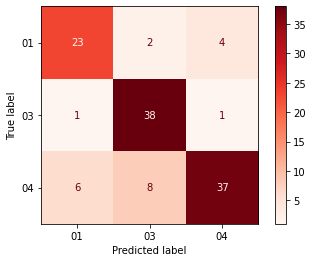

In [341]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_joined_mean, y_test_joined_mean, cmap=plt.cm.Reds)
plt.show()

Feature: 0, Score: 0.00242
Feature: 1, Score: 0.03191
Feature: 2, Score: 0.06971
Feature: 3, Score: 0.03382
Feature: 4, Score: 0.06546
Feature: 5, Score: 0.02815
Feature: 6, Score: 0.02924
Feature: 7, Score: 0.02331
Feature: 8, Score: 0.02480
Feature: 9, Score: 0.02304
Feature: 10, Score: 0.03275
Feature: 11, Score: 0.02089
Feature: 12, Score: 0.02583
Feature: 13, Score: 0.02556
Feature: 14, Score: 0.02427
Feature: 15, Score: 0.01845
Feature: 16, Score: 0.02024
Feature: 17, Score: 0.01975
Feature: 18, Score: 0.02010
Feature: 19, Score: 0.02258
Feature: 20, Score: 0.02083
Feature: 21, Score: 0.01852
Feature: 22, Score: 0.08129
Feature: 23, Score: 0.02150
Feature: 24, Score: 0.02026
Feature: 25, Score: 0.01716
Feature: 26, Score: 0.01673
Feature: 27, Score: 0.01906
Feature: 28, Score: 0.02855
Feature: 29, Score: 0.01902
Feature: 30, Score: 0.02270
Feature: 31, Score: 0.02276
Feature: 32, Score: 0.02849
Feature: 33, Score: 0.01981
Feature: 34, Score: 0.01585
Feature: 35, Score: 0.02031
Fe

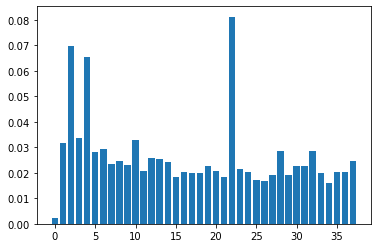

In [342]:
from matplotlib import pyplot as plt
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.ylim(0,0.005)
plt.show()

In [343]:
df_joined_mean.to_csv('df_joined_mean.csv')

In [345]:
df_joined.to_csv('df_joined.csv')

In [347]:
df_spec.to_csv('df_spec.csv')